Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')
    CustomerID        CustomerSegment
0     AA-10315    High-Value Customer
1     AA-10375    High-Value Customer
2     AA-10480    High-Value Customer
3     AA-10645    High-Value Customer
4     AB-10015  Medium-Value Customer
..         ...                    ...
788   XP-21865    High-Value Customer
789   YC-21895    High-Value Customer
790   YS-21880    High-Value Customer
791   ZC-21910    High-Value Customer
792   ZD-21925    High-Value Customer

[793 rows x 2 columns]


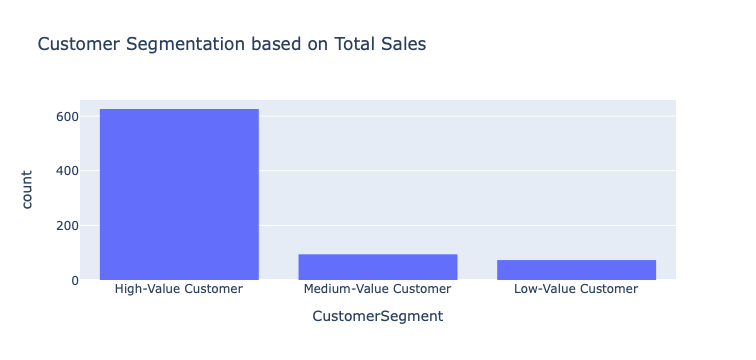

In [37]:
import sqlite3
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('superstore.csv', sep=';')

# Print column names to identify the correct customer identifier column
print(df.columns)

# Create a SQLite database and write the DataFrame to a table
conn = sqlite3.connect('superstore.db')
df.to_sql('Superstore_Sales', conn, index=False, if_exists='replace')

# Define the SQL query with the correct customer identifier column
sql_query = """
    -- Segment customers based on their purchasing behavior
    SELECT
        [Customer ID] AS CustomerID,
        CASE
            WHEN TotalSpent >= 1000 THEN 'High-Value Customer'
            WHEN TotalSpent >= 500 AND TotalSpent < 1000 THEN 'Medium-Value Customer'
            ELSE 'Low-Value Customer'
        END AS CustomerSegment
    FROM
        (SELECT
            [Customer ID],  -- Use the correct column name
            SUM(Sales) AS TotalSpent
        FROM
            Superstore_Sales
        GROUP BY
            [Customer ID]) AS CustomerSpending;
"""

# Execute the query and fetch data into a DataFrame
customer_segments = pd.read_sql_query(sql_query, conn)

# Display the result
print(customer_segments)

# Close the database connection
conn.close()

import plotly.express as px

# Assuming your DataFrame is named customer_segments
fig = px.histogram(customer_segments, x='CustomerSegment', title='Customer Segmentation based on Total Sales')

# Show the plot
fig.show()


0      26196.0
1      73194.0
2       1462.0
3    9575775.0
4      22368.0
Name: Sales, dtype: float64
Mean Sales: 113227.10826495898
Median Sales: 11088.0
Standard Deviation of Sales: 518621.163467688


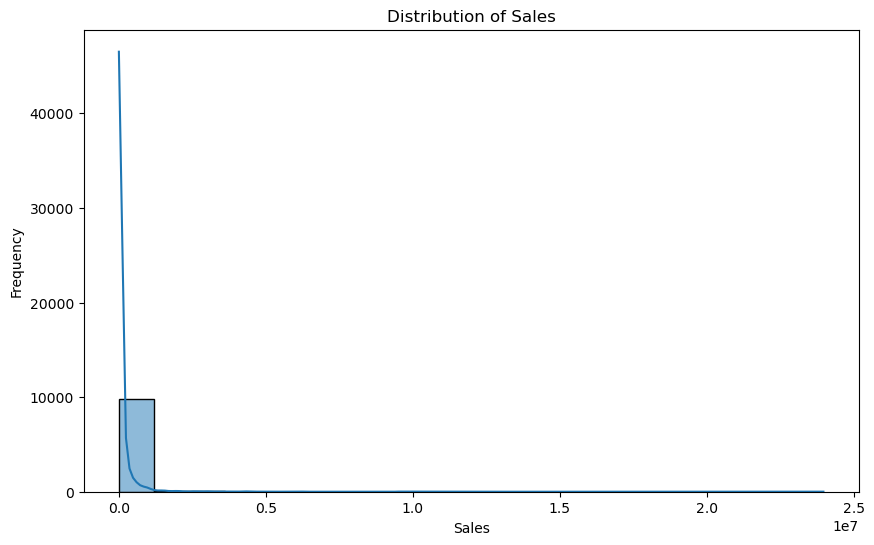

In [64]:
# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns


# Clean up the 'Sales' column
df['Sales'] = df['Sales'].replace('[\$,]', '', regex=True).astype(float)
print(df['Sales'].head())

# Descriptive Statistics
mean_value = df['Sales'].mean()
median_value = df['Sales'].median()
std_deviation = df['Sales'].std()

print("Mean Sales:", mean_value)
print("Median Sales:", median_value)
print("Standard Deviation of Sales:", std_deviation)


plt.figure(figsize=(10, 6))
sns.histplot(df['Sales'], bins=20, kde=True)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

In [81]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Drop non-numeric columns for simplicity (you may need to handle them differently)
numeric_df = df.select_dtypes(include='number')

# Assuming 'Sales' is the target variable
X = numeric_df.drop(['Sales'], axis=1)  # Features (excluding the target variable 'Sales')
y = numeric_df['Sales']  # Target variable is 'Sales'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with scaling and polynomial features
model = make_pipeline(StandardScaler(), PolynomialFeatures(degree=2), LinearRegression())

# Fit the model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 183473802957.4661


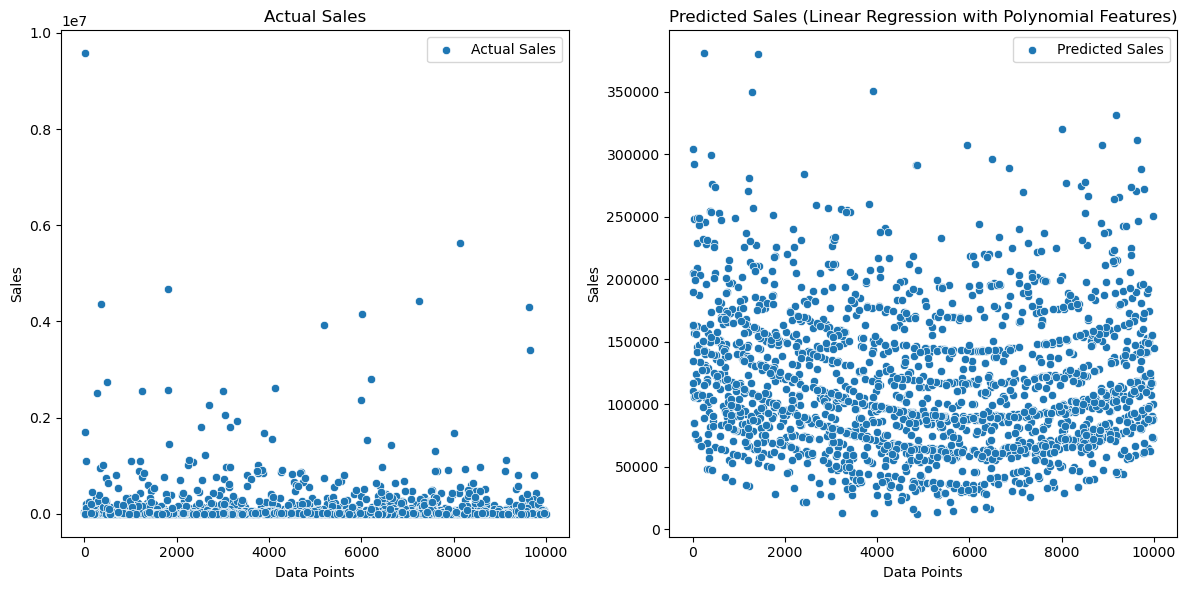

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

# Original data
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test.index, y=y_test, label='Actual Sales')
plt.title('Actual Sales')
plt.xlabel('Data Points')
plt.ylabel('Sales')

# Predictions from linear regression model with polynomial features
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test.index, y=y_pred, label='Predicted Sales')
plt.title('Predicted Sales (Linear Regression with Polynomial Features)')
plt.xlabel('Data Points')
plt.ylabel('Sales')

plt.tight_layout()
plt.show()